In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [35]:
data = pd.read_csv('Data_Regression/qualite-vin-rouge.csv')

In [36]:
data.head()

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorures,dioxyde de soufre libre,anhydride sulfureux total,densité,pH,sulphates,alcool,qualité
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [37]:
data.shape

(1599, 12)

In [38]:
x = np.array(data.iloc[:,:11])
y = np.array(data.qualité)

In [39]:
y = y.reshape(y.shape[0],1)
print(x.shape)
print(y.shape)

(1599, 11)
(1599, 1)


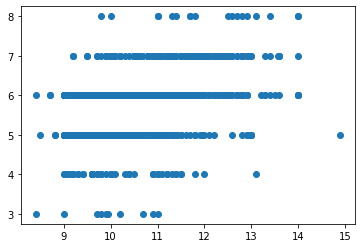

In [40]:
plt.scatter(x[:,10],y)

In [41]:
X = np.hstack((x,np.ones((x.shape[0],1))))

In [42]:
X.shape

(1599, 12)

In [43]:
theta = np.random.randn(12,1)
theta.shape

(12, 1)

In [44]:
def model(X, theta):
    return X.dot(theta)

In [45]:
def fonction_cout(X, theta, y):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2) 

fonction_cout(X, theta, y)

394.61860175799967

In [46]:
def gradient(X, theta, y):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [47]:
def descente_gradient(X, theta, y, alpha, n_iterations):
    cost = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - alpha*gradient(X, theta, y)
        cost[i] = fonction_cout(X, theta, y)
    return theta, cost

In [48]:
nouveau_theta = descente_gradient(X, theta, y, 0.0001, 2000)[0]

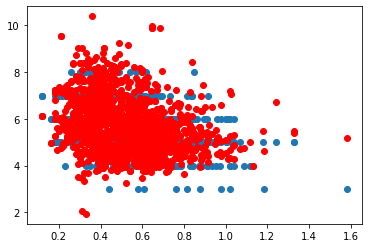

In [49]:
plt.scatter(x[:,1], y)
plt.scatter(x[:,1], model(X, nouveau_theta), c='r')

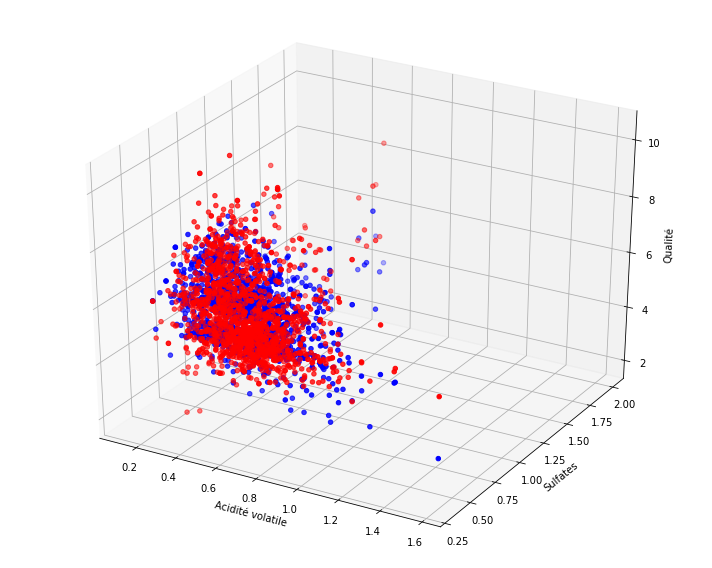

In [50]:
fig = plt.figure(figsize=[10,8])
ax = fig.gca(projection="3d")

ax.scatter(x[:,1], x[:,9], y, c='b', cmap='hsv')
ax.scatter(x[:,1], x[:,9], model(X, nouveau_theta), c='r')
ax.set_xlabel('Acidité volatile')
ax.set_ylabel('Sulfates')
ax.set_zlabel('Qualité')
plt.tight_layout()

In [51]:
def coef_determination(X, theta, y):
    u = ((y - model(X, nouveau_theta))**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [25]:
coef_determination(X, nouveau_theta, y)

-0.657198239237393

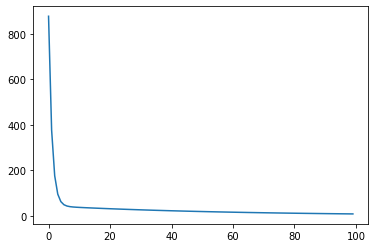

In [26]:
cost_history = np.array(descente_gradient(X, theta, y, 0.0001, 100)[1])
plt.plot(range(len(cost_history)), cost_history)

## Avec Scikit Learn :

In [27]:
data.head()

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorures,dioxyde de soufre libre,anhydride sulfureux total,densité,pH,sulphates,alcool,qualité
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
X = data.iloc[:,:11].values
Y = data.iloc[:,-1].values

Y = Y.reshape(Y.shape[0], 1)

print(X.shape)
print(Y.shape)

(1599, 11)
(1599, 1)


In [29]:
scaler = StandardScaler()

X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)

model = LinearRegression()
model.fit(X, Y)

prediction = model.predict(X)

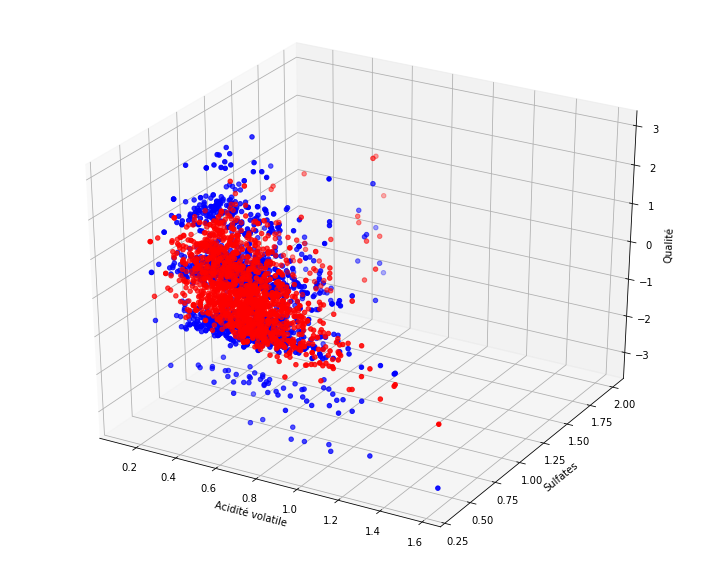

In [52]:
fig = plt.figure(figsize=[10,8])
ax = fig.gca(projection="3d")

ax.scatter(X[:,1], X[:,9], Y, c='b', cmap='hsv')
ax.scatter(X[:,1], X[:,9], prediction, c='r')
ax.set_xlabel('Acidité volatile')
ax.set_ylabel('Sulfates')
ax.set_zlabel('Qualité')
plt.tight_layout()

In [31]:
model.score(X, Y)

0.3605517030386881

In [32]:
erreur = mean_squared_error(Y, prediction)
print(erreur)

0.639448296961312
